# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 595


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(query_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        
# Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port mathurin
Processing Record 2 of Set 1 | nemuro
Processing Record 3 of Set 1 | queenstown
Processing Record 4 of Set 1 | atafu village
Processing Record 5 of Set 1 | lompoc
Processing Record 6 of Set 1 | st. john's
Processing Record 7 of Set 1 | college
Processing Record 8 of Set 1 | island harbour
Processing Record 9 of Set 1 | tiksi
Processing Record 10 of Set 1 | waitangi
Processing Record 11 of Set 1 | sur
Processing Record 12 of Set 1 | hawaiian paradise park
Processing Record 13 of Set 1 | chagoda
Processing Record 14 of Set 1 | bastia
Processing Record 15 of Set 1 | grytviken
Processing Record 16 of Set 1 | haiku-pauwela
Processing Record 17 of Set 1 | ghadamis
Processing Record 18 of Set 1 | blackmans bay
Processing Record 19 of Set 1 | tadmur
Processing Record 20 of Set 1 | fale old settlement
Processing Record 21 of Set 1 | nova vicosa
Processing Record 22 of Set 1 | olinda
Processi

Processing Record 40 of Set 4 | mugia
Processing Record 41 of Set 4 | sunne
Processing Record 42 of Set 4 | lebu
Processing Record 43 of Set 4 | mabaruma
Processing Record 44 of Set 4 | altoona
Processing Record 45 of Set 4 | al muwayh
Processing Record 46 of Set 4 | codrington
Processing Record 47 of Set 4 | beledweyne
Processing Record 48 of Set 4 | ad dilam
Processing Record 49 of Set 4 | levuka
Processing Record 0 of Set 5 | czarna bialostocka
Processing Record 1 of Set 5 | manokwari
Processing Record 2 of Set 5 | tazovsky
Processing Record 3 of Set 5 | kyaikto
Processing Record 4 of Set 5 | 'ohonua
City not found. Skipping...
Processing Record 5 of Set 5 | dongola
Processing Record 6 of Set 5 | margate
Processing Record 7 of Set 5 | meadow lake
Processing Record 8 of Set 5 | arti
Processing Record 9 of Set 5 | barcelos
Processing Record 10 of Set 5 | nuuk
Processing Record 11 of Set 5 | lubang
Processing Record 12 of Set 5 | hami
Processing Record 13 of Set 5 | la'ie
Processing Re

Processing Record 31 of Set 8 | port lincoln
Processing Record 32 of Set 8 | raton
Processing Record 33 of Set 8 | kapit
Processing Record 34 of Set 8 | alice springs
Processing Record 35 of Set 8 | posadas
Processing Record 36 of Set 8 | kuruman
Processing Record 37 of Set 8 | sabang
Processing Record 38 of Set 8 | coquimbo
Processing Record 39 of Set 8 | ivanteyevka
Processing Record 40 of Set 8 | weno
Processing Record 41 of Set 8 | umba
Processing Record 42 of Set 8 | mahabe
City not found. Skipping...
Processing Record 43 of Set 8 | enewetak
Processing Record 44 of Set 8 | shendi
Processing Record 45 of Set 8 | america dourada
Processing Record 46 of Set 8 | nikolayevsk-on-amure
Processing Record 47 of Set 8 | nouadhibou
Processing Record 48 of Set 8 | san antonio de pale
Processing Record 49 of Set 8 | yigo village
Processing Record 0 of Set 9 | ongjin
Processing Record 1 of Set 9 | ploudalmezeau
Processing Record 2 of Set 9 | sorong
Processing Record 3 of Set 9 | fort bragg
Proc

Processing Record 22 of Set 12 | westport
Processing Record 23 of Set 12 | amarillo
Processing Record 24 of Set 12 | cuatro cienegas de carranza
Processing Record 25 of Set 12 | pacific grove
Processing Record 26 of Set 12 | 'alaqahdari dishu
Processing Record 27 of Set 12 | santa barbara
Processing Record 28 of Set 12 | port hedland
Processing Record 29 of Set 12 | lanzhou
Processing Record 30 of Set 12 | berdigestyakh
Processing Record 31 of Set 12 | vila franca do campo
Processing Record 32 of Set 12 | umea
Processing Record 33 of Set 12 | oranjemund
Processing Record 34 of Set 12 | puerto aysen
Processing Record 35 of Set 12 | lospalos
Processing Record 36 of Set 12 | aweil
Processing Record 37 of Set 12 | tobi village
City not found. Skipping...
Processing Record 38 of Set 12 | antonio enes
Processing Record 39 of Set 12 | sola
Processing Record 40 of Set 12 | mendota
Processing Record 41 of Set 12 | cururupu
Processing Record 42 of Set 12 | zapata
Processing Record 43 of Set 12 |

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port mathurin,-19.6833,63.4167,23.73,80,8,3.80,MU,1697586269
1,nemuro,43.3236,145.5750,13.09,66,33,8.38,JP,1697586269
2,queenstown,-31.8976,26.8753,11.50,78,0,0.94,ZA,1697586269
3,atafu village,-8.5421,-172.5159,28.46,73,97,3.18,TK,1697586269
4,lompoc,34.6391,-120.4579,28.90,77,75,7.60,US,1697586269


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port mathurin,-19.6833,63.4167,23.73,80,8,3.80,MU,1697586269
1,nemuro,43.3236,145.5750,13.09,66,33,8.38,JP,1697586269
2,queenstown,-31.8976,26.8753,11.50,78,0,0.94,ZA,1697586269
3,atafu village,-8.5421,-172.5159,28.46,73,97,3.18,TK,1697586269
4,lompoc,34.6391,-120.4579,28.90,77,75,7.60,US,1697586269


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

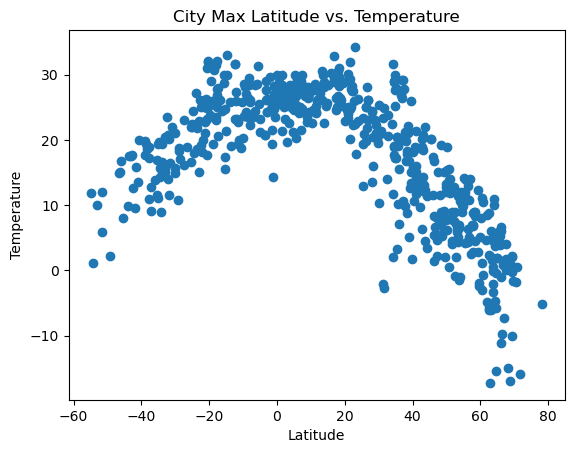

In [9]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']

plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title("City Max Latitude vs. Temperature")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

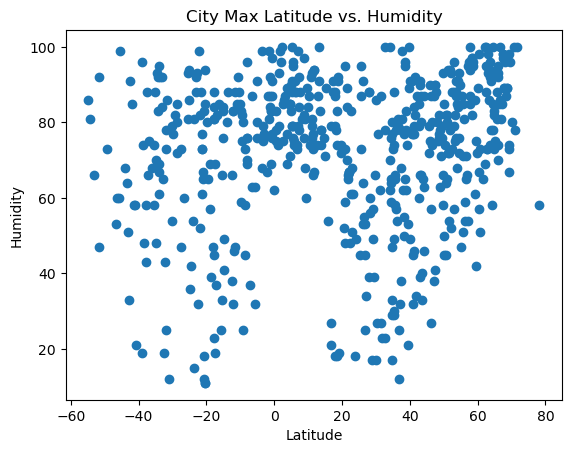

In [10]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']

plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("City Max Latitude vs. Humidity")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

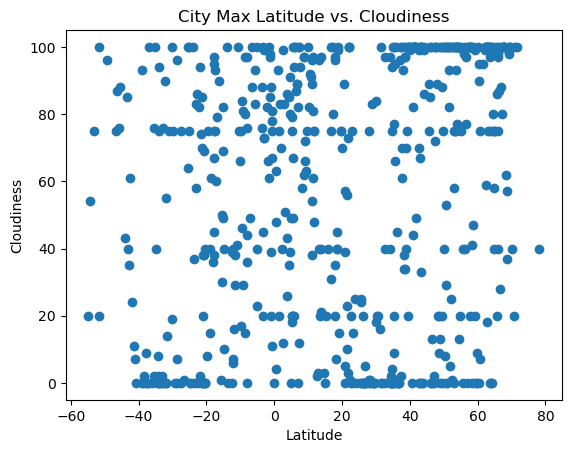

In [11]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']

plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("City Max Latitude vs. Cloudiness")


# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

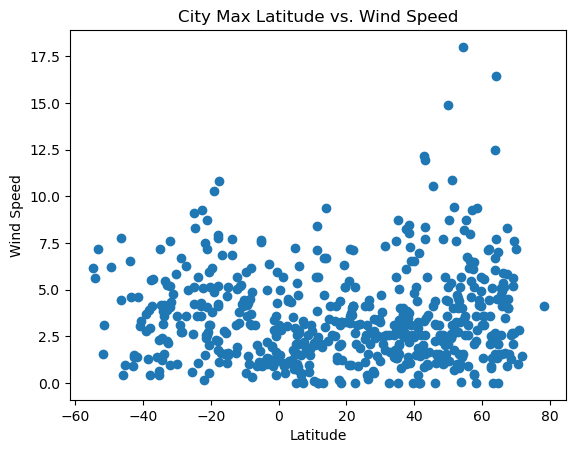

In [12]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']

plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("City Max Latitude vs. Wind Speed")


# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,nemuro,43.3236,145.5750,13.09,66,33,8.38,JP,1697586269
4,lompoc,34.6391,-120.4579,28.90,77,75,7.60,US,1697586269
5,st. john's,47.5649,-52.7093,5.44,90,100,2.57,CA,1697586055
6,college,64.8569,-147.8028,1.92,82,75,2.06,US,1697586269
7,island harbour,50.7240,-1.2758,13.90,82,100,5.36,GB,1697586269


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port mathurin,-19.6833,63.4167,23.73,80,8,3.80,MU,1697586269
2,queenstown,-31.8976,26.8753,11.50,78,0,0.94,ZA,1697586269
3,atafu village,-8.5421,-172.5159,28.46,73,97,3.18,TK,1697586269
9,waitangi,-43.9535,-176.5597,9.86,68,43,6.53,NZ,1697586270
14,grytviken,-54.2811,-36.5092,1.13,81,54,5.65,GS,1697586270


###  Temperature vs. Latitude Linear Regression Plot

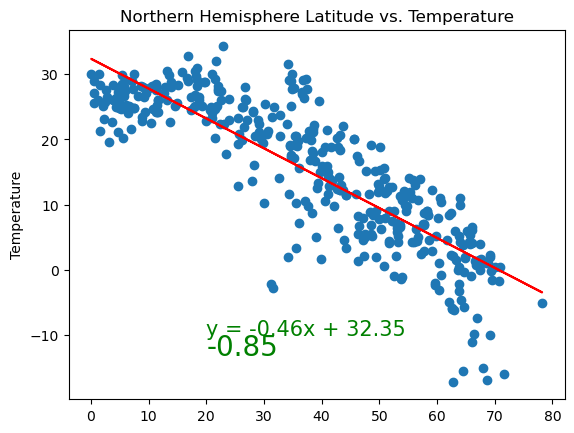

In [16]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,-10),fontsize=15,color="green")
plt.ylabel('Temperature')
plt.title("Northern Hemisphere Latitude vs. Temperature")
plt.annotate(round(rvalue,2),(20,-13),fontsize=20,color="green")
plt.show()

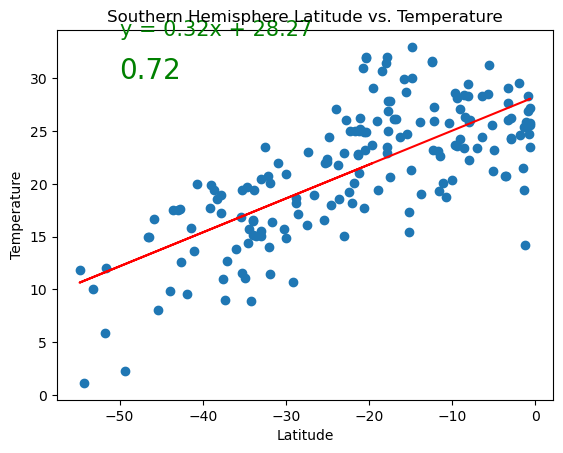

In [17]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,34),fontsize=15,color="green")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title("Southern Hemisphere Latitude vs. Temperature")
plt.annotate(round(rvalue,2),(-50,30),fontsize=20,color="green")
plt.show()

**Discussion about the linear relationship:** With this scatter plot we can see the corrilation of temperature rising with latitude approaching the equater (latitude 0). As the latitude gets closer to 0 we see the temperature steadily rise with it.

### Humidity vs. Latitude Linear Regression Plot

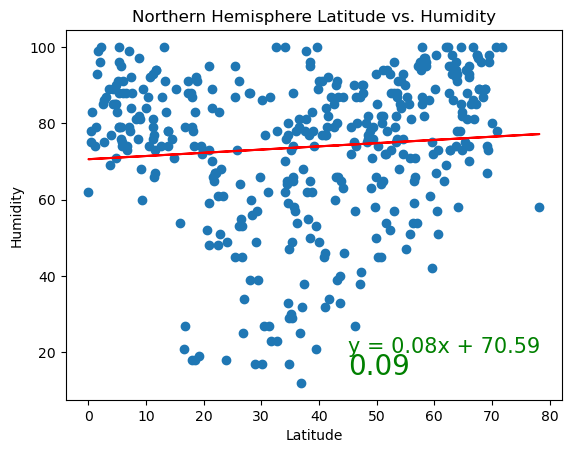

In [18]:
# Northern Hemisphere
# YOUR CODE HERE

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,20),fontsize=15,color="green")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Northern Hemisphere Latitude vs. Humidity")
plt.annotate(round(rvalue,2),(45,14),fontsize=20,color="green")
plt.show()

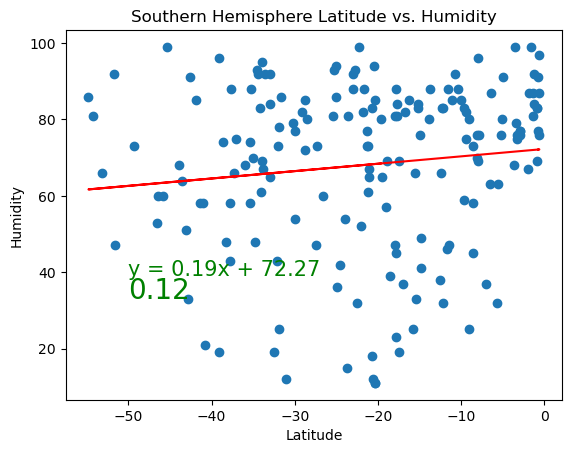

In [19]:
# Southern Hemisphere
# YOUR CODE HERE

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,39),fontsize=15,color="green")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Southern Hemisphere Latitude vs. Humidity")
plt.annotate(round(rvalue,2),(-50,33),fontsize=20,color="green")
plt.show()

**Discussion about the linear relationship:** The relationship between latitude and humidity is less trending than that of latitude and temperature. Our line shows that humidity trends slightly increase as we approach the equator (latitude 0) in the southern hemisphere. When we look at the northern hemisphere we find the humidity slightly rises as it moves further from the equater.

### Cloudiness vs. Latitude Linear Regression Plot

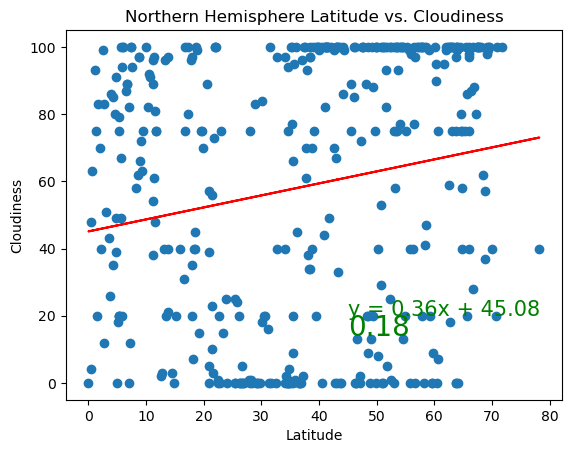

In [20]:
# Northern Hemisphere
# YOUR CODE HERE

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,20),fontsize=15,color="green")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Northern Hemisphere Latitude vs. Cloudiness")
plt.annotate(round(rvalue,2),(45,14),fontsize=20,color="green")
plt.show()

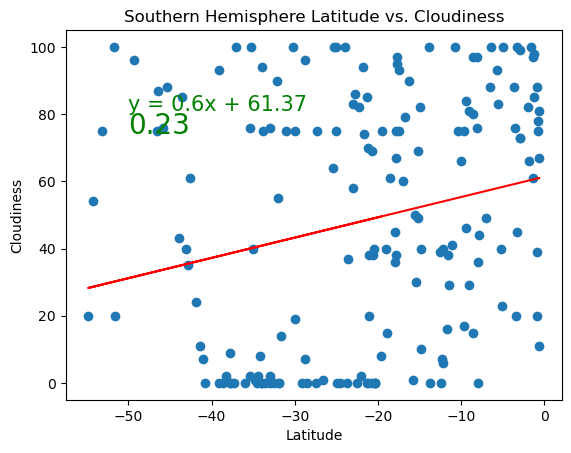

In [21]:
# Southern Hemisphere
# YOUR CODE HERE

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,81),fontsize=15,color="green")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Southern Hemisphere Latitude vs. Cloudiness")
plt.annotate(round(rvalue,2),(-50,74),fontsize=20,color="green")
plt.show()

**Discussion about the linear relationship:** In these scatter plots the same trend as the humidity is found. In the southern hemisphere cloudiness rises as it apporoaches the equater while the nothern hemispher increases as it moves away.

### Wind Speed vs. Latitude Linear Regression Plot

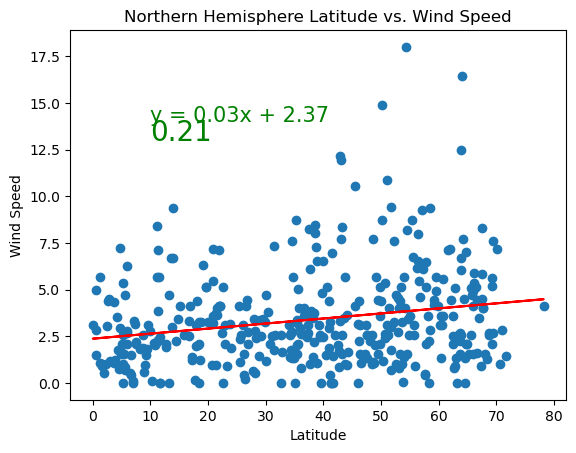

In [22]:
# Northern Hemisphere
# YOUR CODE HERE

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,14),fontsize=15,color="green")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Northern Hemisphere Latitude vs. Wind Speed")
plt.annotate(round(rvalue,2),(10,13),fontsize=20,color="green")
plt.show()

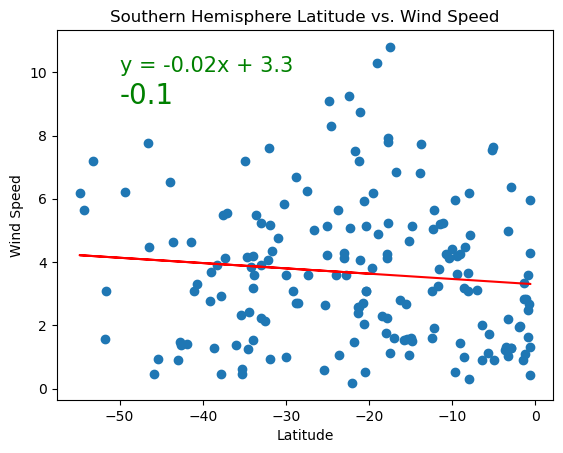

In [23]:
# Southern Hemisphere
# YOUR CODE HERE

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="green")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Southern Hemisphere Latitude vs. Wind Speed")
plt.annotate(round(rvalue,2),(-50,9),fontsize=20,color="green")
plt.show()

**Discussion about the linear relationship:** Wind speed doesn't seem to have much corilation with latitude. Our trend line shows a slight pattern but with so many plots so far off the trend it would be difficult to have much faith that the two variables have much effect on one another.